In [1]:
import numpy as np
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
n = 40
x = np.linspace(-3, 3, n)
y = 0.5 * x**2 + np.random.rand(n) * 5

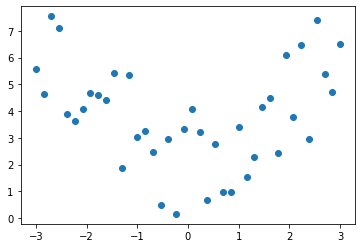

In [3]:
plt.scatter(x, y)

In [14]:
pf = PolynomialFeatures(degree=12)
X = pf.fit_transform(x.reshape(-1, 1))[:, 1:]

x_val = np.linspace(-3, 3, 3 * n)
X_val = pf.transform(x_val.reshape(-1, 1))[:, 1:]

## Без регуляризации

In [15]:
reg = Ridge(alpha=0., max_iter=500)
reg.fit(X, y.reshape(-1, 1))

Ridge(alpha=0.0, max_iter=500)

In [16]:
preds = reg.predict(X_val)

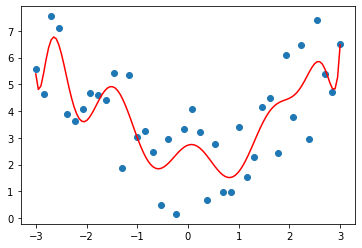

In [17]:
plt.scatter(x, y)
plt.plot(x_val, preds.squeeze(), color='red');

In [18]:
reg.coef_.squeeze()

array([ 6.67496083e-01, -4.67972217e+00, -2.53732891e+00,  7.01093062e+00,
        1.55221943e+00, -3.33232627e+00, -3.56163418e-01,  7.12778584e-01,
        3.47332497e-02, -7.02704382e-02, -1.21292047e-03,  2.59588771e-03])

## С регуляризацией

[[-5.34394640e-02  4.99053258e-02 -5.91530263e-02  8.30910956e-02
  -3.40084775e-02  6.09306205e-02  3.73391874e-02 -2.07248558e-02
  -7.59628728e-03  2.20235029e-03  4.43002157e-04 -7.97389899e-05]]


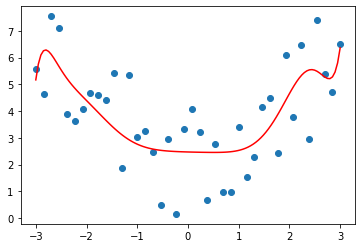

In [21]:
reg = Ridge(alpha=10., max_iter=500)
reg.fit(X, y.reshape(-1, 1))
preds = reg.predict(X_val)
plt.scatter(x, y)
plt.plot(x_val, preds.squeeze(), color='red');
print(reg.coef_)